In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

In [3]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.shape

(8693, 14)

In [6]:
test.shape

(4277, 13)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
train["Cabin"].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [11]:
train["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [12]:
train['HomePlanet'].fillna(method='bfill', inplace=True)
train['CryoSleep'].fillna('False', inplace=True)
train['Cabin'].fillna(method='bfill', inplace=True)
train['Destination'].fillna('PSO J318.5-22', inplace=True)
train['Age'].fillna(method='bfill', inplace=True)
train['VIP'].fillna('False', inplace=True)
train['RoomService'].fillna(method='ffill', inplace=True)
train['FoodCourt'].fillna(method='ffill', inplace=True)
train['ShoppingMall'].fillna(method='ffill', inplace=True)
train['Spa'].fillna(method='ffill', inplace=True)
train['VRDeck'].fillna(method='ffill', inplace=True)
train['Name'].fillna('ZZZ', inplace=True)

test['HomePlanet'].fillna(method='bfill', inplace=True)
test['CryoSleep'].fillna('False', inplace=True)
test['Cabin'].fillna(method='bfill', inplace=True)
test['Destination'].fillna('PSO J318.5-22', inplace=True)
test['Age'].fillna(method='bfill', inplace=True)
test['VIP'].fillna('False', inplace=True)
test['RoomService'].fillna(method='ffill', inplace=True)
test['FoodCourt'].fillna(method='ffill', inplace=True)
test['ShoppingMall'].fillna(method='ffill', inplace=True)
test['Spa'].fillna(method='ffill', inplace=True)
test['VRDeck'].fillna(method='ffill', inplace=True)
test['Name'].fillna('ZZZ', inplace=True)


In [13]:
train.isnull().sum().sum()

0

In [14]:
test.isnull().sum().sum()

0

In [15]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [16]:
# Bar Graph on Planet Distribution

train["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [17]:
ev = train["HomePlanet"].value_counts()
ev

Earth     4697
Europa    2184
Mars      1812
Name: HomePlanet, dtype: int64

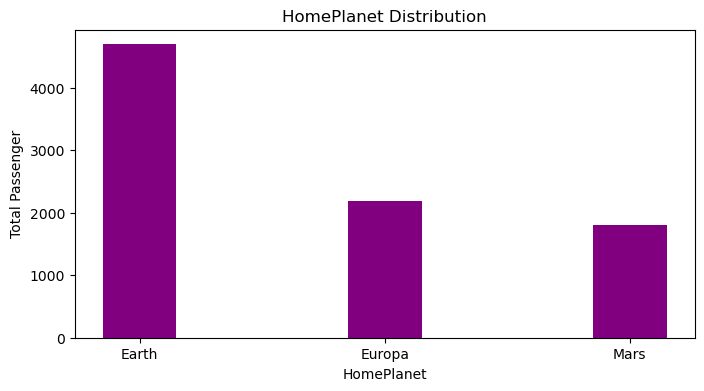

In [18]:
fig = plt.figure(figsize = (8, 4))

# Creating a Bar plot
plt.bar(ev.index, ev, color = "purple", width = 0.3)

plt.title("HomePlanet Distribution")
plt.xlabel("HomePlanet")
plt.ylabel("Total Passenger")
plt.show()

(array([ 598.,  666., 2131., 2014., 1386.,  914.,  546.,  298.,  110.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

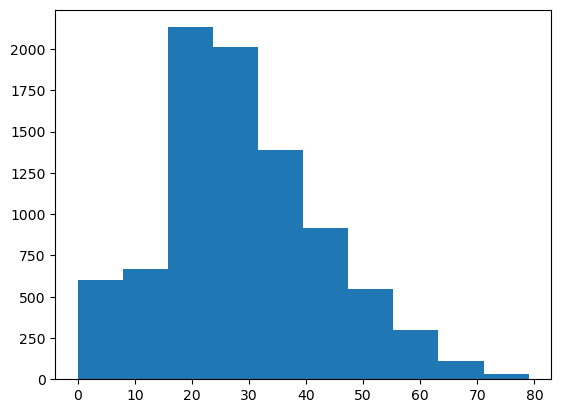

In [19]:
# Plot a histogram on Age
plt.hist(train["Age"])

In [20]:
people_count = train.pivot_table(index = "HomePlanet", columns = "Transported", values = "Destination", aggfunc = "count")

people_count

Transported,False,True
HomePlanet,,
Earth,2704,1993
Europa,748,1436
Mars,863,949


In [21]:
yes = train[train["Transported"] == True]
no = train[train["Transported"] == False]

In [22]:
yes.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True


In [23]:
yes_home = yes["HomePlanet"].value_counts()
yes_home

Earth     1993
Europa    1436
Mars       949
Name: HomePlanet, dtype: int64

In [24]:
no_home = no["HomePlanet"].value_counts()
no_home

Earth     2704
Mars       863
Europa     748
Name: HomePlanet, dtype: int64

In [25]:
total_home = train["HomePlanet"].value_counts()
total_home

Earth     4697
Europa    2184
Mars      1812
Name: HomePlanet, dtype: int64

In [26]:
total_ppl = pd.DataFrame({
    'HomePlanet': total_home.index,
    'total Passenger': total_home.values,
    'Transported' : yes_home.values,
    'not_Transported' : no_home.values,
}, columns = ['HomePlanet', 'total Passenger', 'Transported', 'not_Transported'])

total_ppl

,HomePlanet,total Passenger,Transported,not_Transported
0,Earth,4697,1993,2704
1,Europa,2184,1436,863
2,Mars,1812,949,748


In [27]:
total_ppl.set_index("HomePlanet", inplace = True)
total_ppl

,total Passenger,Transported,not_Transported
HomePlanet,,,
Earth,4697,1993,2704
Europa,2184,1436,863
Mars,1812,949,748


In [28]:
trace1 = go.Bar(
    y=total_ppl['Transported'].values,
    x=total_ppl.index,
    marker_color='indianred',
    name='Transported Passenger'
)

trace2 = go.Bar(
    y=total_ppl['not_Transported'].values,
    x=total_ppl.index,
    marker_color='lightsalmon',
    name='not_Transported Passenger'

)


data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title="Transported people by HomePlanet",
    xaxis={
        'title':"HomePlanet",
    },
    yaxis={
        'title':"Total Transported Passenger",
    }
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [30]:
# Plot a piechart on transported people

Transported = train[train['Transported'] == True]
notTransported = train[train['Transported'] == False]

In [31]:
print("Transported: ", len(Transported))
print("Not_Transported: ", len(notTransported))

Transported:  4378
Not_Transported:  4315


array([<AxesSubplot:ylabel='0'>], dtype=object)

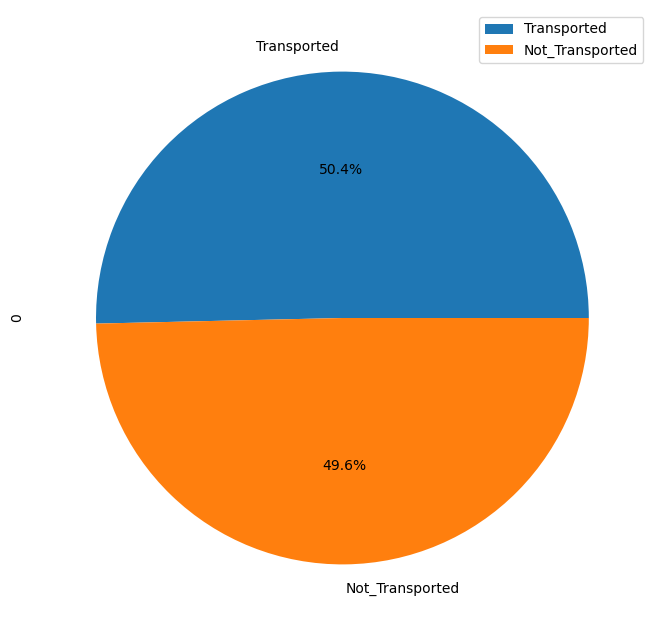

In [32]:
ppl_Transported = pd.DataFrame([ len(Transported), len(notTransported)], index=['Transported', 'Not_Transported'])
ppl_Transported.plot(kind = 'pie', subplots = True, figsize=(16,8), autopct = '%1.1f%%' )

In [34]:
# Circle plot on destination place

train["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [35]:
des = train["Destination"].value_counts()
des

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     978
Name: Destination, dtype: int64

In [36]:
des_pass = pd.DataFrame({
    'Destination' : des.index,
    'Total_Passenger' : des.values
},columns = ['Destination', 'Total_Passenger'])

des_pass

,Destination,Total_Passenger
0,TRAPPIST-1e,5915
1,55 Cancri e,1800
2,PSO J318.5-22,978


In [37]:
des_pass.set_index("Destination", inplace = True)

Text(0.5, 1.0, 'Total passenger by destination place')

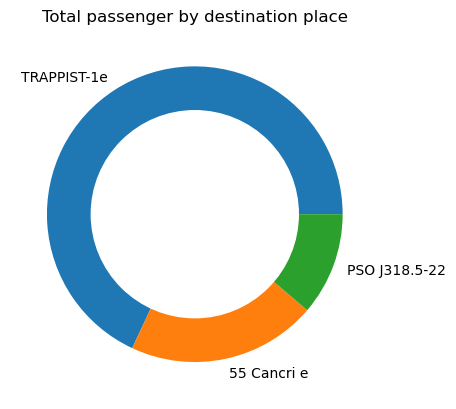

In [38]:
circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(des_pass['Total_Passenger'], labels= des_pass.index)
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Total passenger by destination place')

In [39]:
total_ppl

,total Passenger,Transported,not_Transported
HomePlanet,,,
Earth,4697,1993,2704
Europa,2184,1436,863
Mars,1812,949,748


In [40]:
# Find transported and not_transported homeplanet wise

def transpeople(start,end):
    # set width of bar
    barWidth = 0.20
    
    #set height of bar
    bars1 = total_ppl['total Passenger'][start:end]
    bars2 = total_ppl['Transported'][start:end]
    bars3 = total_ppl['not_Transported'][start:end]
    
    
    # set position of bar on X axis
    r1 = np.arange(bars1.size)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
     # Make the plot
    plt.bar(r1, bars1, color='#36688D', width=barWidth, edgecolor='white', label='Total Passenger')
    plt.bar(r2, bars2, color='#F3CD05', width=barWidth, edgecolor='white', label='Transported')
    plt.bar(r3, bars3, color='#F49F05', width=barWidth, edgecolor='white', label='not_Transported')
    
    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len(bars1))], total_ppl.index[start:end])

    # Create legend & Show graphic
    plt.legend()

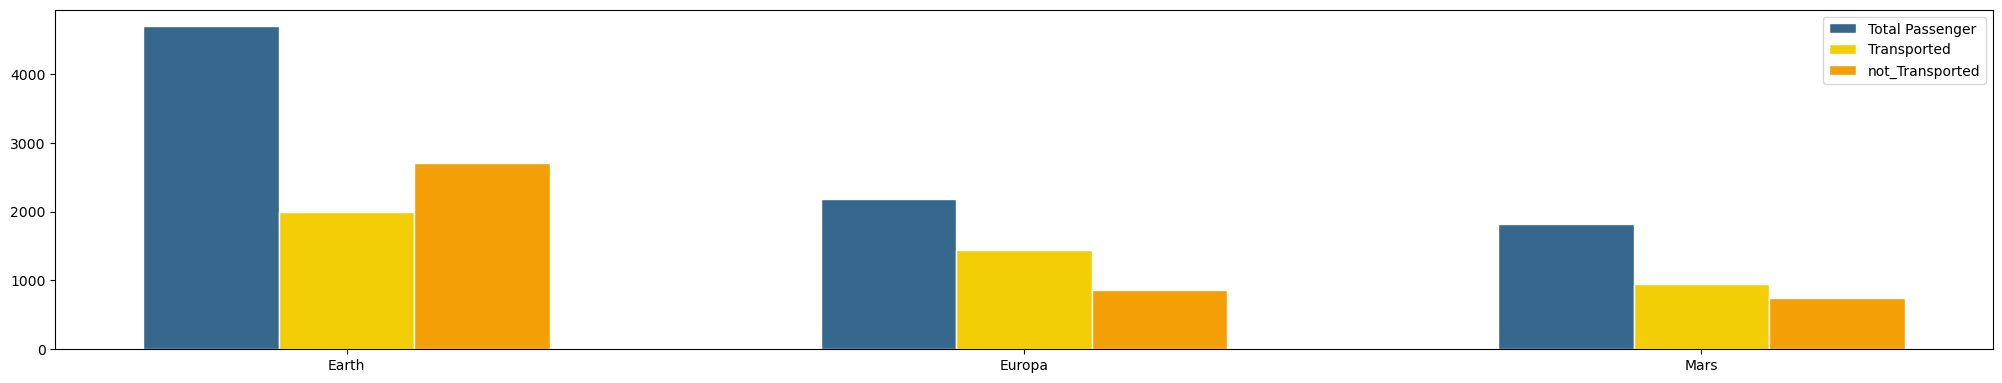

In [41]:
fig = plt.figure(figsize = (25, 15))

plt.subplot(311)
transpeople(0, 3)

In [44]:
#  Drop unnecessary columns

train.drop('PassengerId', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)
# train.drop('Cabin', axis=1, inplace=True)

test.drop('PassengerId', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
# test.drop('Cabin', axis=1, inplace=True)

KeyError: "['PassengerId'] not found in axis"

In [46]:
train[['cabinn', 'a', 'b']] = train['Cabin'].str.split('/', expand=True)

train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabinn,a,b
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [47]:
test[["cabinn", "a", "b"]] = train["Cabin"].str.split("/", expand = True)

test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabinn,a,b
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,0,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,A,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,A,0,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,1,S


In [48]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['encoded_HomePlanet'] = label_encoder.fit_transform(train['HomePlanet'])

train['encoded_Cabinn'] = label_encoder.fit_transform(train['cabinn'])

train['encoded_Destination'] = label_encoder.fit_transform(train['Destination'])

train['encoded_Transported'] = label_encoder.fit_transform(train['Transported'])

train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1,2,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0,5,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,1,0,2,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,1,0,2,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0,5,2,1


In [49]:
def encode_bool_train(x):
    if x == True:
        return 1
    else:
        return 0

train['CryoSleep'] = train['CryoSleep'].apply(encode_bool_train)
train['VIP'] = train['VIP'].apply(encode_bool_train)


print(encode_bool_train)

<function encode_bool_train at 0x713d6a81d830>


In [50]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1,2,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0,S,0,5,2,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,1,0,2,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,1,0,2,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1,S,0,5,2,1


In [51]:
label_encoder = preprocessing.LabelEncoder()
test['encoded_HomePlanet'] = label_encoder.fit_transform(test['HomePlanet'])
test['encoded_Cabinn'] = label_encoder.fit_transform(test['cabinn'])
test['encoded_Destination'] = label_encoder.fit_transform(test['Destination'])

test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,0,1,2
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,0,S,0,5,2
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,A,0,S,1,0,0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,A,0,S,1,0,2
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,1,S,0,5,2


In [52]:
def encode_bool_test(x):
    if x == True:
        return 1
    else:
        return 0

test['CryoSleep'] = test['CryoSleep'].apply(encode_bool_test)
test['VIP'] = test['VIP'].apply(encode_bool_test)


print(encode_bool_test)

<function encode_bool_test at 0x713d6a81d290>


In [53]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabinn,a,b,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,B,0,P,0,1,2
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,0,S,0,5,2
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,A,0,S,1,0,0
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,A,0,S,1,0,2
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,1,S,0,5,2


In [54]:
# Drop unnecessary column

train.drop('HomePlanet', axis=1, inplace=True)

train.drop('Cabin', axis=1, inplace=True)

train.drop('cabinn', axis=1, inplace=True)

train.drop('Destination', axis=1, inplace=True)

train.drop('Transported', axis=1, inplace=True)

train.drop('a', axis=1, inplace=True)

train.drop('b', axis=1, inplace=True)


test.drop('HomePlanet', axis=1, inplace=True)

test.drop('Cabin', axis=1, inplace=True)

test.drop('cabinn', axis=1, inplace=True)

test.drop('Destination', axis=1, inplace=True)

test.drop('a', axis=1, inplace=True)

test.drop('b', axis=1, inplace=True)

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()

In [56]:
cols_to_norm = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

train[cols_to_norm] = train[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))

test[cols_to_norm] = test[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))

In [57]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,2,0
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,5,2,1
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,0,2,0
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,0,2,0
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,5,2,1


In [58]:
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,2
1,0,19.0,0,0.000000,0.035611,0.000000,14.225963,0.000000,0,5,2
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0
3,0,38.0,0,0.000000,26.320579,0.000000,0.912114,2.626616,1,0,2
4,0,20.0,0,0.086453,0.000000,7.657984,0.000000,0.000000,0,5,2


In [59]:
x = train.drop('encoded_Transported', axis=1)
y = train['encoded_Transported']

In [60]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination,encoded_Transported
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,2,0
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,5,2,1
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,0,2,0
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,0,2,0
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,5,2,1


In [61]:
test["encoded_Cabinn"].unique()

array([1, 5, 0, 6, 4, 3, 2, 7])

In [62]:
x.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Cabinn,encoded_Destination
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,2
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,5,2
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,0,2
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,0,2
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,5,2


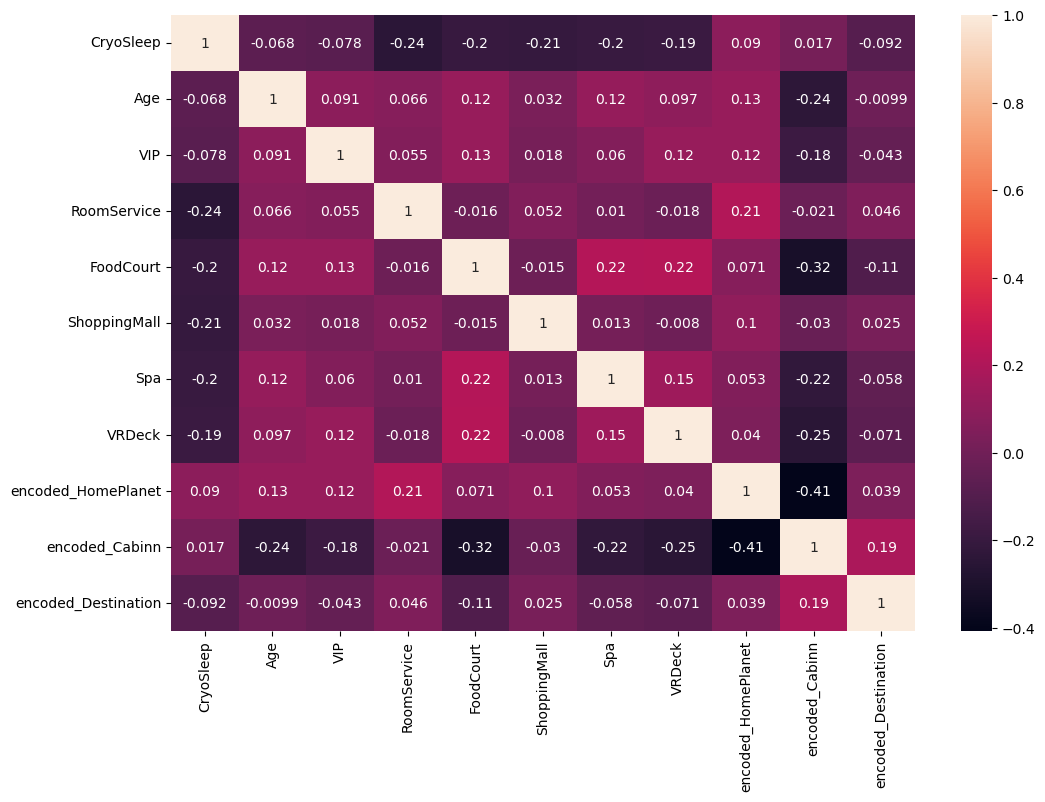

In [63]:
# now, plot the data

plt.figure(figsize=(12,8))
ax = sns.heatmap(x.corr(), annot=True)
plt.show()

In [64]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [65]:
corr_features = correlation(x, 0.3)
len(set(corr_features))

1

In [66]:
corr_features

{'encoded_Cabinn'}

In [67]:
X_corr = x.drop(corr_features, axis = 1)
X_corr

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Destination
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,2
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,2
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,2
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,2
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,2
...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.000000,22.872572,0.000000,7.332203,0.306634,1,0
8689,1,18.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
8690,0,26.0,0,0.000000,0.000000,7.968670,0.004463,0.000000,0,2
8691,0,32.0,0,0.000000,3.518599,0.000000,1.575330,13.404881,1,0


In [68]:
X_corr = x.drop(corr_features, axis = 1)
X_corr

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Destination
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,2
1,0,24.0,0,0.760801,0.030188,0.106419,2.450018,0.182323,0,2
2,0,58.0,1,0.300133,11.994767,0.000000,29.966976,0.203041,1,2
3,0,33.0,0,0.000000,4.303492,1.579261,14.856301,0.799735,1,2
4,0,16.0,0,2.114888,0.234797,0.642772,2.521421,0.008287,0,2
...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.000000,22.872572,0.000000,7.332203,0.306634,1,0
8689,1,18.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
8690,0,26.0,0,0.000000,0.000000,7.968670,0.004463,0.000000,0,2
8691,0,32.0,0,0.000000,3.518599,0.000000,1.575330,13.404881,1,0


In [69]:
test_data = test.drop(corr_features, axis = 1)
test_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,encoded_HomePlanet,encoded_Destination
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
1,0,19.0,0,0.000000,0.035611,0.000000,14.225963,0.000000,0,2
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
3,0,38.0,0,0.000000,26.320579,0.000000,0.912114,2.626616,1,2
4,0,20.0,0,0.086453,0.000000,7.657984,0.000000,0.000000,0,2
...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
4273,0,42.0,0,0.000000,3.351403,0.205017,0.050393,0.646552,0,2
4274,1,43.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,0
4275,0,43.0,0,0.000000,10.604202,0.000000,0.000000,2.348240,1,1


In [70]:
from sklearn import tree
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_corr, y, test_size = 0.3)

In [71]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (6085, 10)
x_test:  (2608, 10)
y_train:  (6085,)
y_test:  (2608,)


In [72]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [73]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
pred = clf.predict(x_test)

In [75]:
clf.score(x_test, y_test)

0.727760736196319

In [76]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[ 882,  388],
       [ 322, 1016]])

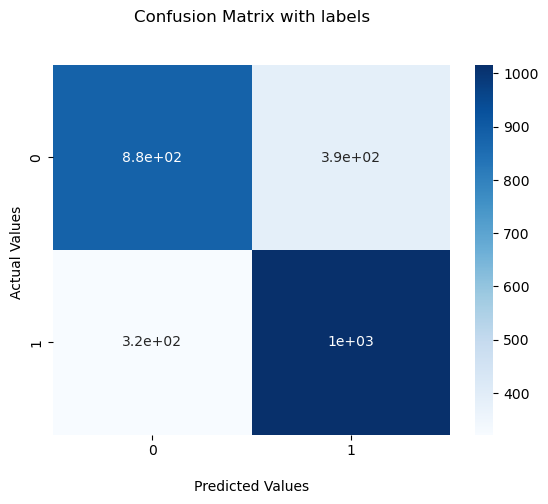

In [77]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [78]:
fnl = clf.predict(test_data)
fnl

array([1, 0, 1, ..., 1, 1, 0])